In [81]:
# demo of Perlin noise
# see blog post comparing pure randomness with value and gradient noise
# http://makeyourownalgorithmicart.blogspot.co.uk/2018/02/randomness-and-perlin-noise.html

In [82]:
import numpy
import random
import math

import matplotlib.pyplot as plt
%matplotlib inline  

In [83]:
# polynomial smoothing function
# had zero derivataive at 0 and 1
# this one also has zero 2nd derivative

def blend(x):
    return 6*x**5 - 15*x**4 + 10*x**3

In [84]:
# how much data
how_much = 10

In [85]:
# create a list of 2d vectors

random_vectors = []

for i in range(how_much):
    angle = random.random() * math.tau;
    x = math.cos(angle)
    y = math.sin(angle)
    random_vectors.append(numpy.array([x,y]))
    pass

# show just the first ten
random_vectors[:10]

[array([ 0.79571533,  0.60567079]),
 array([-0.94902087, -0.31521325]),
 array([-0.97595829,  0.21795738]),
 array([-0.98932984, -0.14569303]),
 array([-0.53264581, -0.84633825]),
 array([-0.15614321, -0.98773443]),
 array([-0.86721564, -0.49793276]),
 array([ 0.32239179, -0.94660633]),
 array([ 0.0622803,  0.9980587]),
 array([ 0.78341733,  0.62149601])]

In [86]:
# traverse along x axis

x_values = []
noise_values = []

x = 0
while(x < (how_much-1)):    
    # find nearest vectors
    below = math.floor(x)
    above = below + 1
    
    # calculate the dot products between the random vectors and the vector to x
    dotproduct_1 = numpy.dot(random_vectors[below], numpy.array([x-below,0]))
    dotproduct_2 = numpy.dot(random_vectors[above], numpy.array([x-above,0]))
    
    # smooth distances from intervals
    blended_below = blend(x-below)
    blended_above = blend(above-x)
    # linear interpolation
    interpolated = (blended_below*dotproduct_2) + (blended_above*dotproduct_1)
    
    x_values.append(x)
    noise_values.append(interpolated)
    
    x += 0.01
    pass


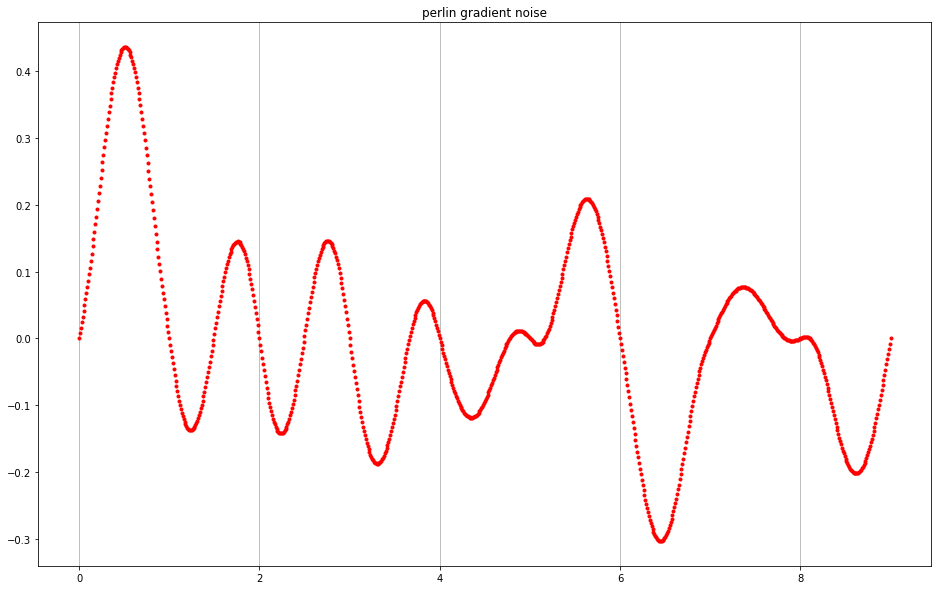

In [87]:
# plot noise
plt.figure(figsize=(16,10))
plt.plot(x_values,noise_values, 'r.')
plt.title("perlin gradient noise")
plt.gca().xaxis.grid(True)